# Task 2 - Model Building and Training 


**Loading the datasets for modeling**




In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging
from logger import SetupLogger
# Assuming this class is defined in scripts/
from load_data import LoadData  

logger = SetupLogger(log_file='../logs/notebooks.log').get_logger()


Load the datasets

In [2]:
# Create instances
load_fraud = LoadData('../data/processed_fraud_data.csv', logger=logger)
load_credit = LoadData('../data/creditcard.csv', logger=logger)
# Load the datasets
fraud_data = load_fraud.load_dataset().set_index('user_id')
credit_data = load_credit.load_dataset()



In [3]:
# Explore the few rows
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
fraud_data.head()

,purchase_value,age,class,purchase_delay,hour_of_day,day_of_week,fraud_rate,user_transaction_frequency,device_transaction_frequency,user_transaction_velocity,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
user_id,,,,,,,,,,,,,,,,,
247547,0.549607,-0.363124,0,-0.413800,-1.231124,1.487911,-0.233869,0.0,-0.259874,-0.232945,0.0,1.0,0.0,0.0,0.0,1.0,0.0
220737,-1.197335,0.101168,0,-1.180852,1.229002,-0.505034,-1.259767,0.0,-0.259874,-0.232943,0.0,1.0,0.0,0.0,0.0,0.0,0.0
390400,0.385831,-0.479197,0,-0.936126,1.663142,0.989675,-0.354204,0.0,0.116936,-0.232944,0.0,0.0,0.0,1.0,0.0,0.0,1.0
69592,0.986342,-0.363124,0,0.867086,0.650149,0.989675,-0.354204,0.0,-0.259874,-0.232946,1.0,0.0,0.0,0.0,0.0,0.0,0.0
174987,0.767974,0.449387,0,1.700633,-1.086411,-1.003270,-1.259767,0.0,-0.259874,-0.232946,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Understand the shapes
credit_data.shape, fraud_data.shape

((284807, 31), (129146, 17))

In [6]:
# Check any missing values
print(credit_data.isnull().sum())
print(fraud_data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
purchase_value                  0
age                             0
class                           0
purchase_delay                  0
hour_of_day                     0
day_of_week                     0
fraud_rate                      0
user_transaction_frequency      0
device_transaction_frequency    0
user_transaction_velocity       0
source_Direct                   0
source_SEO                      0
browser_FireFox                 0
browser_IE                      0
browser_Opera                   0
browser_Safari                  0
sex_M                           0
dtype: int64


**Data Preparation:**
- Check class Imbalance

- Feature and Target Separation [‘Class’(creditcard), ‘class’(Fraud_Data)]
Train-Test Split 

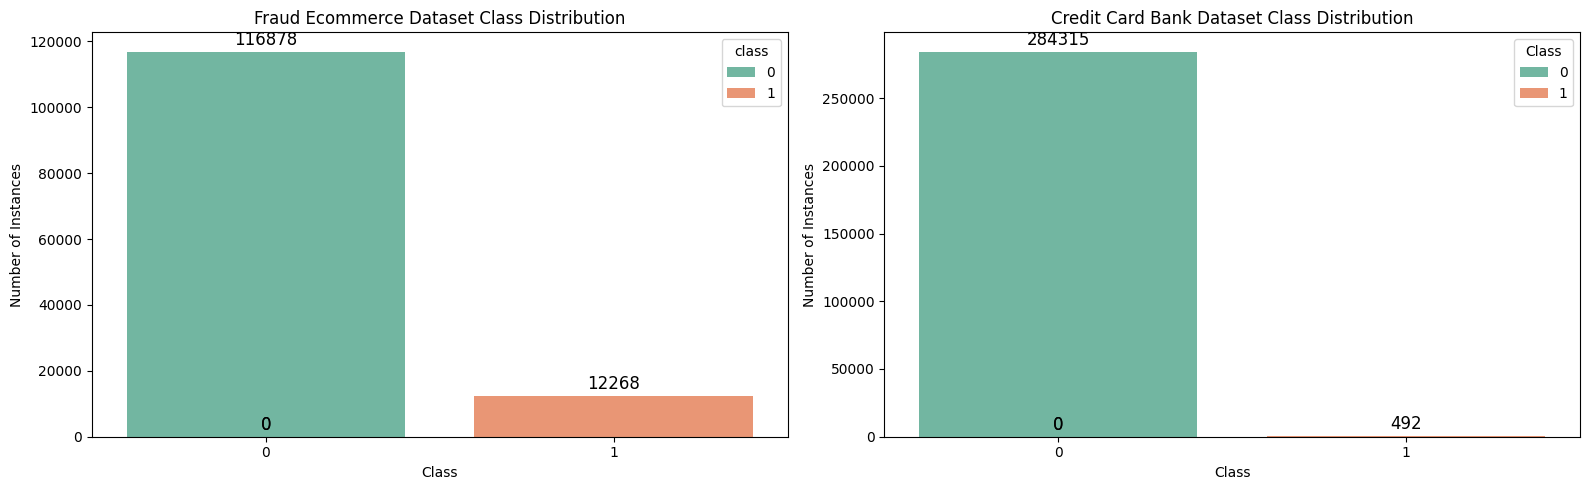

In [7]:
# Function to plot class distribution with total numbers on top of each bar
def plot_class_distribution(class_counts, ax, dataset_name):
    colors = sns.color_palette("Set2", n_colors=len(class_counts))  # Choose a color palette with distinct colors
    sns.barplot(x=class_counts.index, y=class_counts.values, palette=colors, ax=ax, hue=class_counts.index)  # Use the distinct color palette
    ax.set_title(f'{dataset_name} Class Distribution')
    ax.set_ylabel('Number of Instances')
    ax.set_xlabel('Class')
    ax.set_xticks(class_counts.index)

    # Annotate the total number on top of each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    fontsize=12, color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

# Create a figure with subplots for both datasets
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Check class distribution in fraud dataset
fraud_class_counts = fraud_data['class'].value_counts()  # Ensure 'class' is the correct column name
# Check class distribution in credit card dataset
creditcard_class_counts = credit_data['Class'].value_counts()  # Ensure 'Class' is the correct column name

# Plot for fraud dataset
plot_class_distribution(fraud_class_counts, axes[0], 'Fraud Ecommerce Dataset')

# Plot for credit card dataset
plot_class_distribution(creditcard_class_counts, axes[1], 'Credit Card Bank Dataset')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


**Class Imbalance Summary**

Fraud Ecommerce Dataset:

- Class 0 (non-fraudulent): 116,878 instances
- Class 1 (fraudulent): 12,268 instances
- Imbalance: Significant, with Class 1 underrepresented.

Credit Card Bank Dataset:

- Class 0: 284,315 instances
- Class 1: 492 instances
- Imbalance: Extreme, posing serious challenges.

Implications:
- Biased Models: Models may favor the majority class, resulting in poor detection of fraud.
- Underfitting/Overfitting: Risk of models failing to generalize across classes.
- Evaluation Challenges: Traditional metrics like accuracy can be misleading.

Addressing Class Imbalance:
- Oversampling: Increase minority class instances (e.g., SMOTE).

In [3]:
from imblearn.over_sampling import SMOTE

# Function to apply SMOTE
def apply_smote(X_train, y_train):

    # Apply SMOTE to the training set
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    return X_resampled, y_resampled

For creditcard dataset (target column 'Class'):
- Separate Features and Target
- apply smote(class balancing technique)
- Split into train and test sets


In [4]:
from data_preparation import DataPreparation
# Assuming df_creditcard is the DataFrame for the credit card dataset
_creditcard = DataPreparation(credit_data, target_column='Class')
_creditcard.train_test_split(test_size=0.2, random_state=42)

# Retrieving the train and test sets
X_train_cc, X_test_cc, y_train_cc, y_test_cc = _creditcard.get_train_test_data()

# apply class balancing technique(SMOTE)

# For Credit Card Bank Dataset
X_credit_resampled, y_credit_resampled = apply_smote(X_train_cc, y_train_cc)

print("\nCredit Card Bank Dataset Class Distribution After SMOTE:")
print(pd.Series(y_credit_resampled).value_counts())


Data split into training and testing sets successfully.

Credit Card Bank Dataset Class Distribution After SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


For Fraud_Data dataset (target column 'class'):

- Separate Features and Target
- Split into train and test sets
- Apply class balancing technique(SMOTE)

In [5]:
# Assuming df_fraud is the DataFrame for the fraud dataset
_fraud = DataPreparation(fraud_data, target_column='class')
_fraud.train_test_split(test_size=0.2, random_state=42)

# Retrieving the train and test sets
X_train_fd, X_test_fd, y_train_fd, y_test_fd = _fraud.get_train_test_data()
# Apply class balancing technique(SMOTE)
# For Fraud Ecommerce Dataset
X_fraud_resampled, y_fraud_resampled = apply_smote(X_train_fd, y_train_fd)
# Check the class distribution after SMOTE
print("Fraud Ecommerce Dataset Class Distribution After SMOTE:")
print(pd.Series(y_fraud_resampled).value_counts())

Data split into training and testing sets successfully.
Fraud Ecommerce Dataset Class Distribution After SMOTE:
class
0    93459
1    93459
Name: count, dtype: int64


### Model Selection
- Import ModelPipeline class from model_pipeline
- Train multiple models
- hyperparameter tune
- evaluate the model
- compare the model

In [6]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1' # Disable CUDA

# Import the class
from model_pipeline import ModelPipeline

2024-10-27 02:21:21.797424: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-27 02:21:24.797317: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-27 02:21:27.762863: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-27 02:21:29.786343: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-27 02:21:30.581469: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-27 02:21:55.161516: W tensorflow/compiler/tf2tensorrt/utils/p

**Train and Evaluate the models on the e-commerce fruad dataset**


Tuning hyperparameters for Random Forest...
Random Forest best parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Tuning hyperparameters for Gradient Boosting...
Gradient Boosting best parameters: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100}
Random Forest took 52.61 seconds to train


2024/10/27 02:31:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'random_forest' already exists. Creating a new version of this model...
Created version '13' of model 'random_forest'.


Random Forest model trained and logged with MLflow
Gradient Boosting took 59.10 seconds to train


2024/10/27 02:32:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'gradient_boosting' already exists. Creating a new version of this model...
Created version '13' of model 'gradient_boosting'.


Gradient Boosting model trained and logged with MLflow
808/808 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


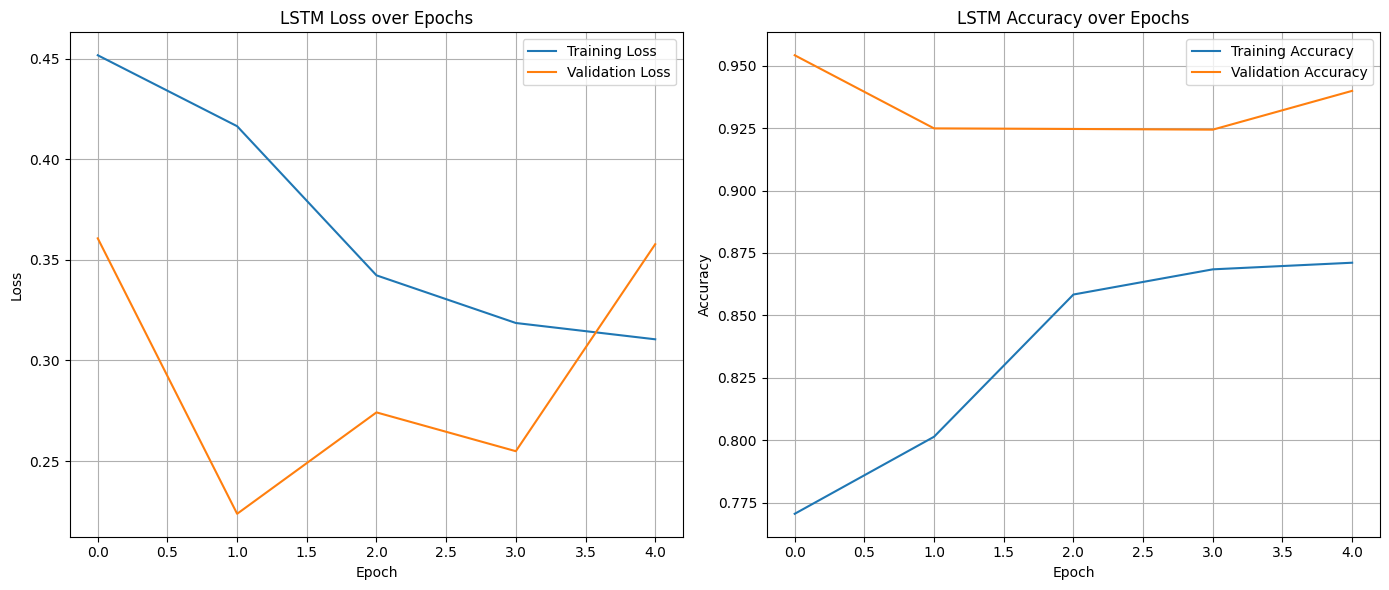

2024/10/27 02:39:24 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


LSTM took 396.00 seconds to train


2024/10/27 02:40:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'lstm' already exists. Creating a new version of this model...
Created version '13' of model 'lstm'.


LSTM model trained and logged with MLflow
808/808 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


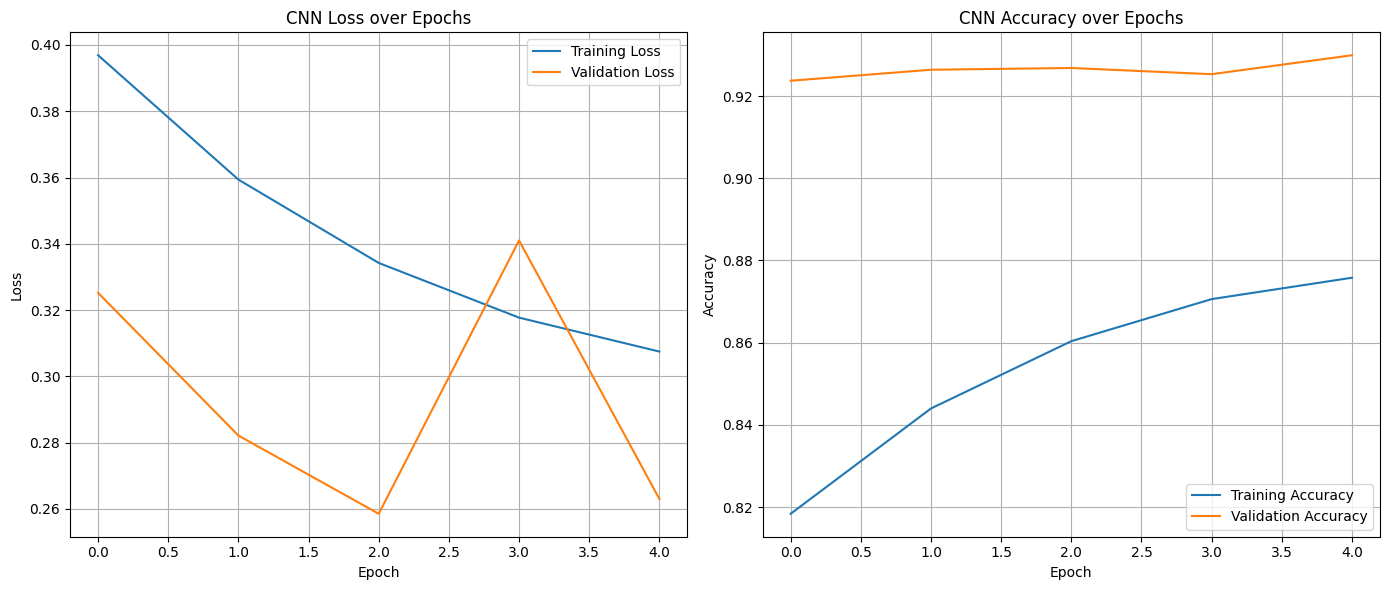

2024/10/27 02:41:18 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


CNN took 56.25 seconds to train


2024/10/27 02:41:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'cnn' already exists. Creating a new version of this model...


CNN model trained and logged with MLflow
Gradient Boosting best model saved.


Created version '12' of model 'cnn'.


In [7]:
# Create instance of the pipeline
model_pipeline = ModelPipeline(X_fraud_resampled, X_test_fd, y_fraud_resampled, y_test_fd)

# add models
# model_pipeline.add_models()
# Train and evaluate, logging with MLflow
best_model, best_model_name = model_pipeline.train_and_evaluate()
# Save the best model
model_pipeline.save_best_models(best_model, best_model_name, 'fraud')

In [11]:
best_model, best_model_name

(Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier', GradientBoostingClassifier())]),
 'Gradient Boosting')

In [12]:
# Get the results 
results_fraud, y_probs_fraud = model_pipeline.get_results()


In [13]:
pd.DataFrame(results_fraud).T

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Random Forest,0.954743,0.921875,0.562837,0.698944,0.828505
Gradient Boosting,0.952033,0.856882,0.583575,0.694301,0.832722
LSTM,0.939876,0.699349,0.624222,0.659654,0.831108
CNN,0.929926,0.615621,0.663625,0.638723,0.827387


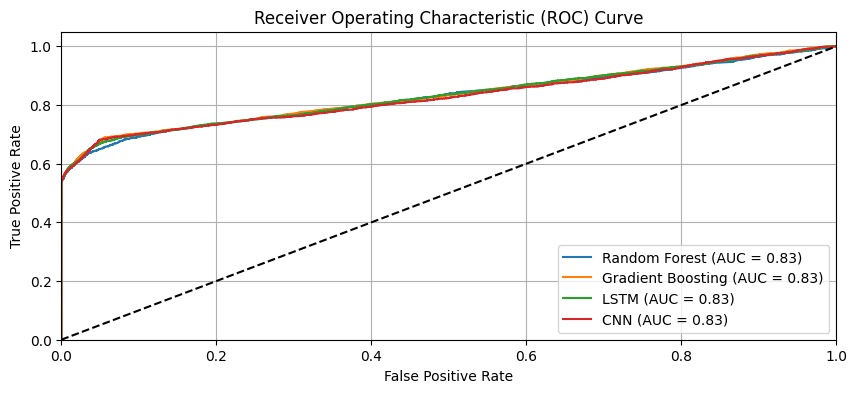

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(y_true, y_probs_dict):
    """
    Plots ROC curves for multiple models based on predicted probabilities.
    
    Parameters:
    - y_true: array-like, shape (n_samples,) - True binary labels (0 for non-fraud, 1 for fraud).
    - y_probs_dict: dict - Dictionary with model names as keys and predicted probabilities as values.
    
    Returns:
    - None
    """
    plt.figure(figsize=(10, 4))

    # Loop through each model's predicted probabilities
    for model_name, probs in y_probs_dict.items():
        fpr, tpr, _ = roc_curve(y_true, probs)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve for each model
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    # Plot settings
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line for random guess
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Plot roc auc of fraud:
plot_roc_curves(y_test_fd, y_probs_fraud)


**Train and Evaluate the models on the creditcard dataset**


Tuning hyperparameters for Random Forest...
Random Forest best parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Tuning hyperparameters for Gradient Boosting...
Gradient Boosting best parameters: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100}
Random Forest took 720.54 seconds to train


2024/10/26 15:11:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'random_forest' already exists. Creating a new version of this model...
Created version '11' of model 'random_forest'.


Random Forest model trained and logged with MLflow
Gradient Boosting took 1232.59 seconds to train


2024/10/26 15:34:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'gradient_boosting' already exists. Creating a new version of this model...
Created version '11' of model 'gradient_boosting'.


Gradient Boosting model trained and logged with MLflow


2024-10-26 15:37:08.706673: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 54588240 exceeds 10% of free system memory.


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step


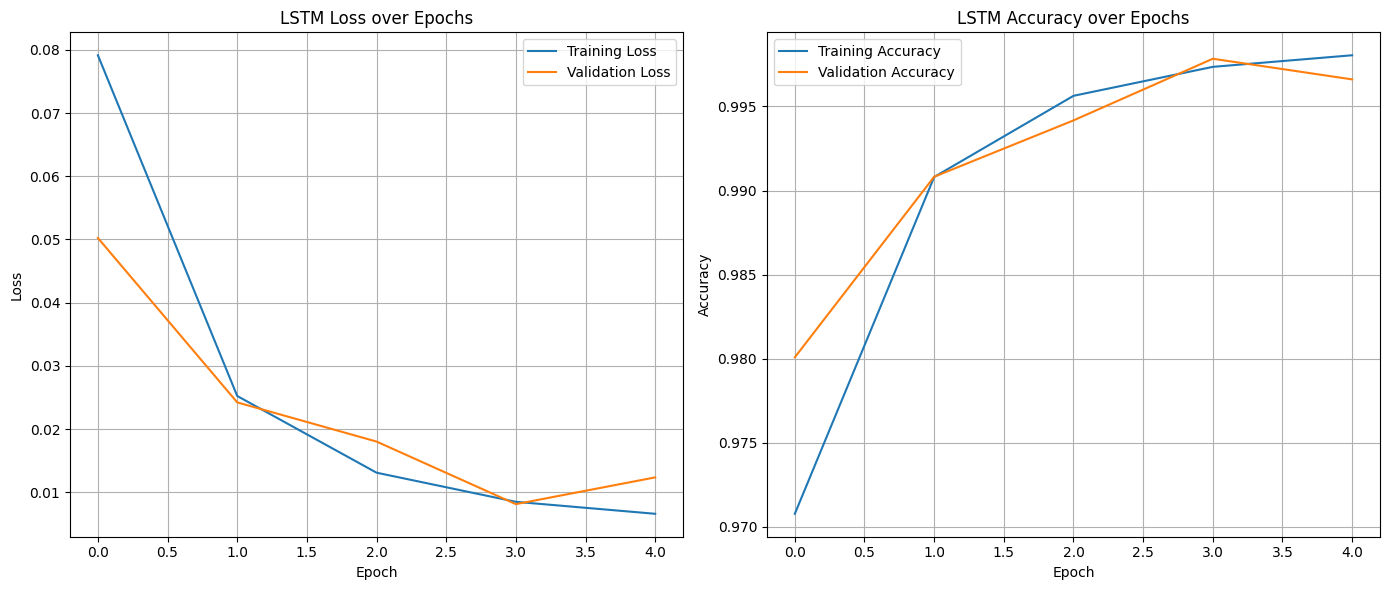

LSTM took 1474.63 seconds to train


2024/10/26 15:59:17 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/26 16:01:19 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpyn33p832/model, flavor: keras). Fall back to return ['keras==3.6.0']. Set logging level to DEBUG to see the full traceback. 
2024/10/26 16:01:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'lstm' already exists. Creating a new version of this model...
Created version '11' of model 'lstm'.


LSTM model trained and logged with MLflow


2024-10-26 16:01:36.524964: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 54588240 exceeds 10% of free system memory.


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


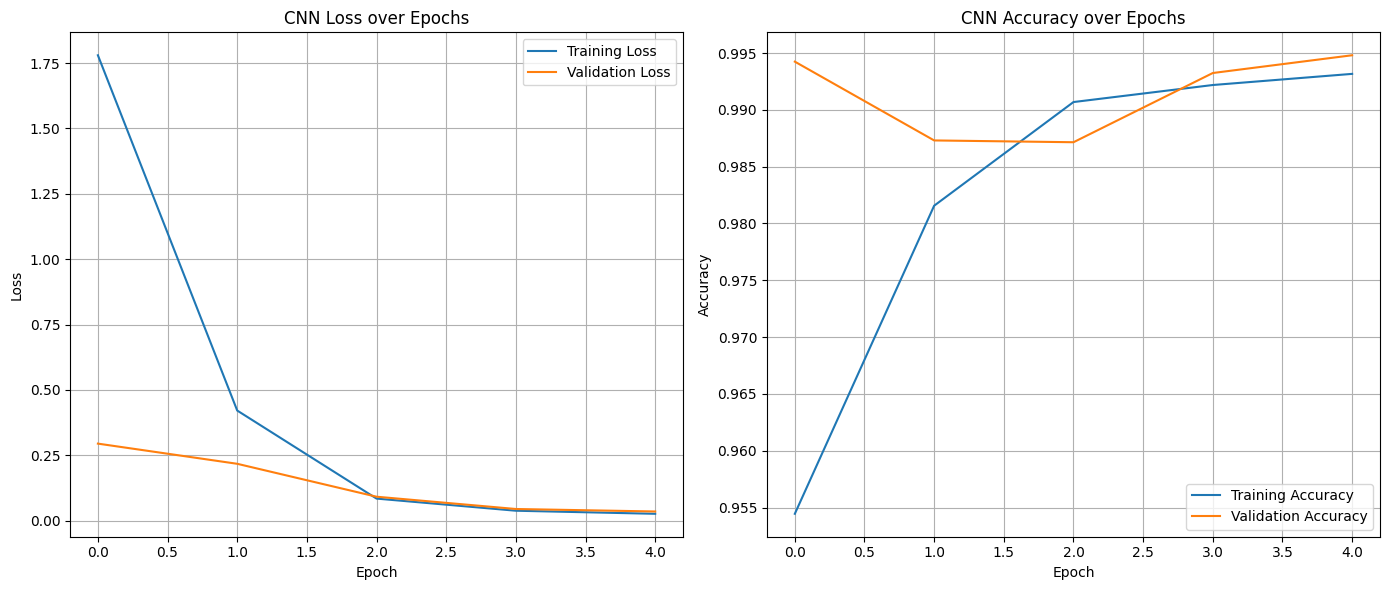

2024/10/26 16:04:17 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


CNN took 176.71 seconds to train


2024/10/26 16:04:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'cnn' already exists. Creating a new version of this model...
Created version '10' of model 'cnn'.


CNN model trained and logged with MLflow
Gradient Boosting best model saved.


In [6]:
# Create instance of the pipeline
model_pipeline = ModelPipeline(X_credit_resampled, X_test_cc, y_credit_resampled, y_test_cc)

# add models
model_pipeline.add_models()
# Train and evaluate, logging with MLflow
best_model, best_model_name = model_pipeline.train_and_evaluate()
# Save the best model
model_pipeline.save_best_models(best_model, best_model_name, 'creditcard')

In [7]:
# Get the results 
results_creditcard, y_probs_credicard = model_pipeline.get_results()

In [8]:
pd.DataFrame(results_creditcard).T

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Random Forest,0.999526,0.865979,0.857143,0.861538,0.975232
Gradient Boosting,0.994119,0.213075,0.897959,0.344423,0.984442
LSTM,0.996612,0.318008,0.846939,0.462396,0.974764
CNN,0.994804,0.232432,0.877551,0.367521,0.953888


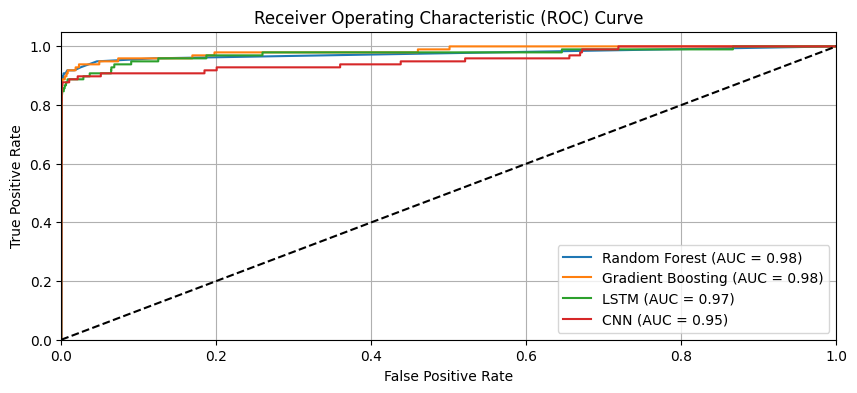

In [11]:
# Plot roc auc of fraud:
plot_roc_curves(y_test_cc, y_probs_credicard)

**Note:** Model training and evaluation have been completed, with all processes tracked using MLflow. Please refer to the document for screenshots showcasing the tracked models across different versions.

## Task 3 - Model Explainability

Model explainability is crucial for understanding, trust, and debugging in machine learning models. I will use SHAP (SHapley Additive exPlanations) and LIME (Local Interpretable Model-agnostic Explanations) to interpret the models I built for fraud detection.



Using SHAP and LIME for Explainability of the model trained with E-commerce fraud detection

Generating SHAP explanations...


 97%|=================== | 25143/25830 [00:24<00:00]       

Type of SHAP values: <class 'numpy.ndarray'>
Shape of SHAP values: (25830, 16)


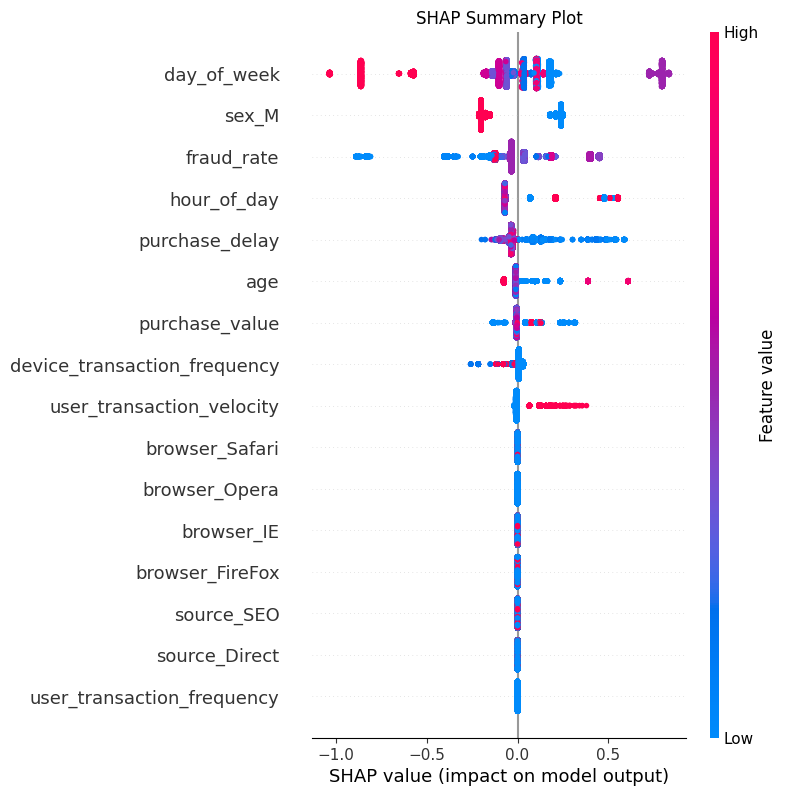

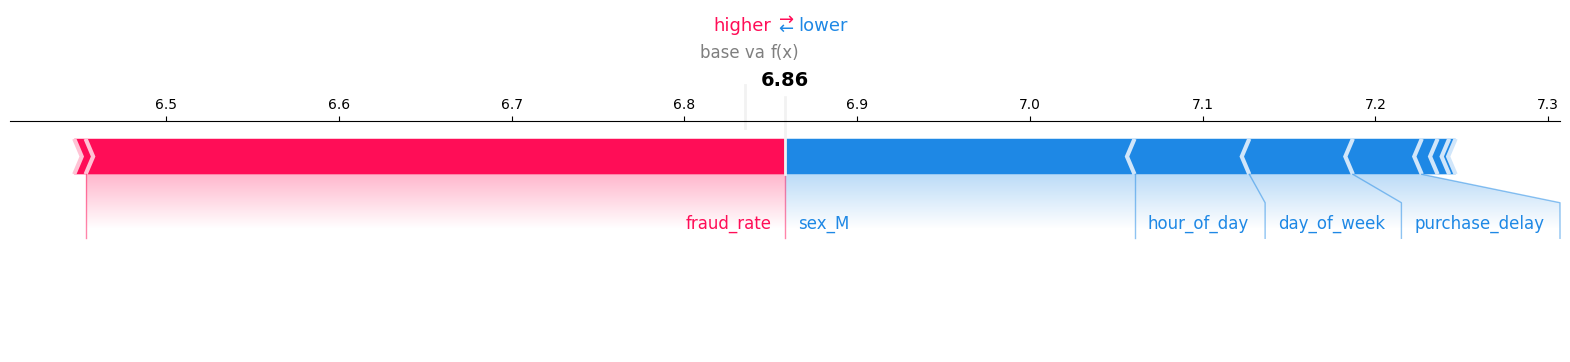

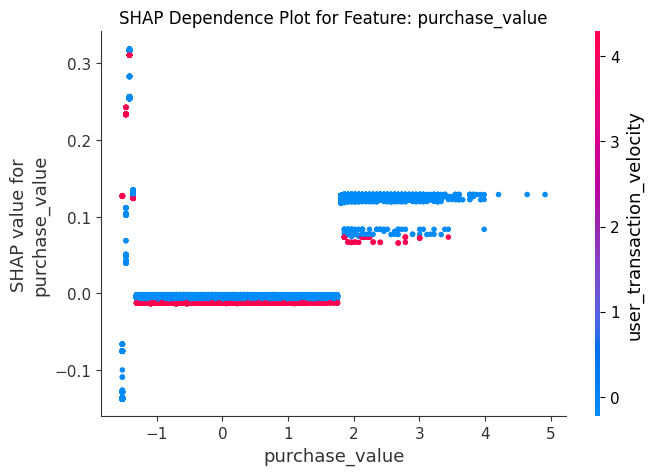

Generating LIME explanations...
Instance shape for LIME: (16,)


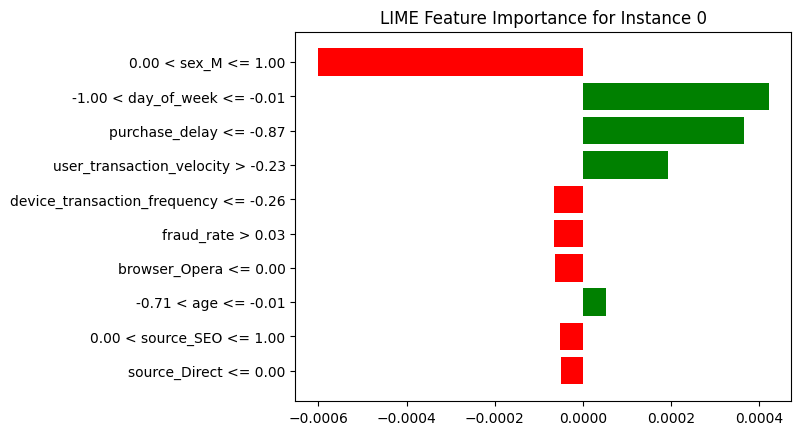

In [89]:
# # Import neccessary modules
from model_explainer import ModelExplainer

# Create instance of the class
fraud_explainer = ModelExplainer('../fraud-detection-api/gradient_boosting_fraud_best_model.pkl', X_test_fd)

 # Explains the first instance in the dataset
fraud_explainer.explain_model(instance_idx=0) 

The explainability techniques were implemented on the e-commerce fraud dataset to understand how individual features influence model performance, and you can refer to the interpretation of the summary plots detailed above in the report.